## Take home Quiz #2 
    1) The **Quiz 2 - Logistic Regression with Gradient Descent** notebook describes very clearly the **logistic regression** method for classifying data where the dependent variable takes binary values.
    2) The notebook ** Quiz 2: gradientdescent - reading assignment** applies variations of gradient descent including **stochastic gradient descent** method to linear regression problem. 
    3) You are supposed to implement the gradient descent methods in 2) for solving the logistic regression problem using the data set from notebook 1).
    4) you are supposed to compare the various gradient methods for logistic regression problem using as measures a) the number of iterations required, b) times, and c) accuracy (compare the solution  with the one obtained from sklearn routine). You can use your own larger dataset.
    5) On thursday I will ask randomly various groups to present parts of take home quiz 2
    6) Submit the take home quiz 2 by Thursday Nov. 5

## Understanding Logistic Regression

This notebook  discusses the basics of Logistic Regression and its implementation in Python. Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X.
We can also say that the target variable is categorical. Based on the number of categories, Logistic regression can be classified as:

    1.	binomial: target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc. 
    2.	multinomial: target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”. 
    3.	ordinal: it deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3. 
    
First of all, we explore the simplest form of Logistic Regression, i.e **Binomial Logistic Regression**.

### Binomial Logistic Regression

Consider an example dataset which maps the number of hours of study with the result of an exam. The result can take only two values, namely passed(1) or failed(0):

**Hours(x)**:	0.50	0.75	1.00	1.25	1.50	1.75	2.00	2.25	2.50	2.75	3.00	3.25	3.50	3.75	4.00	4.25	4.50	4.75	5.00	5.50
    
**Pass(y)**:	0	0	0	0	0	0	1	0	1	0	1	0	1	0	1	1	1	1	1	1
    
So, we have

  $$ y = \begin{cases} 0, & \text{if exam fail} \\
                    1, & \text{if exam pass}
  \end{cases}
  $$
 
i.e. y is a categorical target variable which can take only two possible type:$"0"$ or $“1”$.

In order to generalize our model, we assume that:
•	The dataset has $'p'$ feature variables and $'n'$  observations. 
•	The feature matrix is represented as:


$$
X = 
\begin{pmatrix}
1 & x_{11} & \dots & x_{1p}\\
1 & x_{21} & \dots & x_{2p}\\
\vdots &\vdots & \ddots & \vdots \\
1 & x_{n1} & \dots & x_{np}\\
\end{pmatrix}
$$

 Here,  $x_ij$ denotes the values of $j^{th}$ feature for  $i^{th}$ observation.
 Here, we are keeping the convention of letting $x_{i0} = 1$. (Keep reading, you will understand the logic in a few moments). 
•	The $i^{th}$ observation, $x_i$ , can be represented as:

 $x_i = \begin{pmatrix}1\\x_{i1}\\x_{i2}\\ \vdots \\x_{ip}\end{pmatrix}$
 
•	$h(x_i)$ represents the predicted response for $i_{th}$  observation, i.e. $x_{i}$. The formula we use for calculating  $h(x_i)$ is called **hypothesis**. 

If you have gone though Linear Regression, you should recall that in Linear Regression, the hypothesis we used for prediction was:

$h(x_i) = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \ldots + \beta_px_{ip}$
 
where, $\beta_0,\beta_1,\dots,\beta_p$ are the regression coefficients.
Let regression coefficient matrix/vector, $\beta$ be:

$\beta = \begin{pmatrix}\beta_0\\\beta_1\\\beta_2\\ \vdots \\ \beta_p\end{pmatrix}$
 
Then, in a more compact form,

$h(x_i) = \beta^Tx_i$

>The reason for taking  $x_0 = 1$ is pretty clear now.
We needed to do a matrix product, but there was no
actual  $x_0$ multiplied to $\beta_0$ in original hypothesis formula. So, we defined $x_0 = 1$. 


Now, if we try to apply Linear Regression on above problem, we are likely to get continuous values using the hypothesis we discussed above. Also, it does not make sense for $h(x_i)$ to take values larger that 1 or smaller than 0.
So, some modifications are made to the hypothesis for classification:

$h(x_i) = g(\beta^Tx_i) = \frac{1}{1+e^{-\beta^Tx_i}}$
 
where,

$g(z) = \frac{1}{1+e^{-z}}$
 
is called logistic function or the sigmoid function.
Here is a plot showing g(z)

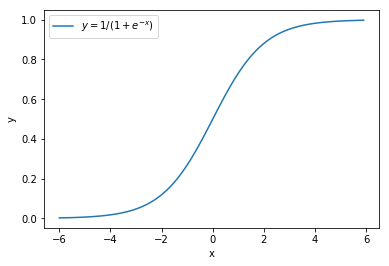
 
We can infer from above graph that:

 •	g(z) tends towards 1 as  $z \to \infty$
 
 •	g(z) tends towards 0 as  $z \to -\infty$
 
 •	g(z) is always bounded between 0 and 1

So, now, we can define conditional probabilities for 2 labels(0 and 1) for $i^{th}$ observation as:

$P(y_i = 1|x_i;\beta) = h(x_i)$

$P(y_i = 0|x_i;\beta) = 1 -  h(x_i)$ 

We can write it more compactly as:

$P(y_i|x_i;\beta) = (h(x_i))^{y_i}(1-h(x_i))^{1-y_i}$
 
Now, we define another term, likelihood of parameters as:

$L(\beta) = \prod_{i=1}^{n}P(y_i|x_i;\beta)$

or 

$L(\beta) = \prod_{i=1}^{n}(h(x_i))^{y_i}(1-h(x_i))^{1-y_i}$

>Likelihood is nothing but the probability of data(training examples), given a model and specific parameter values(here, \beta ). It measures the support provided by the data for each possible value of the \beta. We obtain it by multiplying all $P(y_i|x_i)$ for given  \beta. 

And for easier calculations, we take log likelihood:

$l(\beta) = log(L(\beta))$

or 

$l(\beta) = \sum_{i=1}^{n}[y_ilog(h(x_i)) + (1 - y_i)log(1 - h(x_i))]$
 
The **cost function** for logistic regression is proportional to inverse of likelihood of parameters. Hence, we can obtain an expression for cost function, $J$ using log likelihood equation as:

$J(\beta) = \sum_{i=1}^{n}[-y_ilog(h(x_i)) - (1 - y_i)log(1 - h(x_i))]$
 
and our aim is to estimate  so that cost function is minimized !!

### Using Gradient descent algorithm

Firstly, we take partial derivatives of $J(\beta)$  w.r.t each  to derive the stochastic gradient descent rule(we present only the final derived value here):

$\frac{\partial J(\beta)}{\partial \beta_j} = (h(x) - y)x_j$
 
Here, $y$ and $h(x)$ represent the response vector and predicted response vector(respectively). Also, $x_j$ is the vector representing the observation values for $j^{th}$  feature.

Now, in order to get min $J(\beta)$,

$Repeat \\{
    \beta_j := \beta_j - \alpha \sum_{i=1}^{n}(h(x_i) -                 y_i)x_{ij} \\
    \text {simultaneously update all } \beta_j
    }$


where  $\alpha$ is called learning rate and needs to be set explicitly.


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

def loadCSV(filename):
    '''
    function to load dataset
    '''
    with open(filename,"r") as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for i in range(len(dataset)):
            dataset[i] = [float(x) for x in dataset[i]]     
    return np.array(dataset)


def normalize(X):
    '''
    function to normalize feature matrix, X
    '''
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X


def logistic_func(beta, X):
    '''
    logistic(sigmoid) function
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T)))

def log_gradient(beta, X, y):
    '''
    logistic gradient function
    '''
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
    final_calc = np.dot(first_calc.T, X)
    return final_calc

def cost_func(beta, X, y):
    '''
    cost function, J
    '''
    log_func_v = logistic_func(beta, X)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1 - y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

def pred_values(beta, X):
    '''
    function to predict labels
    '''
    pred_prob = logistic_func(beta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    return np.squeeze(pred_value)


def plot_reg(X, y, beta, title):
    '''
    function to plot decision boundary
    '''
    # labelled observations
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]
    x0_0 = [] 
    x1_1 = []
    x0_0 = np.array(x_0[:,1])
    x0_1 = np.array(x_0[:,2])
    x1_0 = np.array(x_1[:,1])
    x1_1 = np.array(x_1[:,2])
    
    # plotting points with diff color for diff label
    plt.scatter(x0_0, x0_1, c='b', label='y = 0')
    plt.scatter(x1_0, x1_1, c='r', label='y = 1')
    
    # plotting decision boundary
    x1 = np.arange(0, 1, 0.1)
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
    plt.plot(x1, x2, c='k', label='reg line')

    plt.xlabel('Χ')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()


In [2]:
# Import 'time' library in order to compute time cost
import time

# Read the dataset and prepare the X,y and betas for gradient descent!

# load the dataset
dataset = loadCSV('dataset1.csv')
        
# normalizing feature matrix
X = normalize(dataset[:, :-1])

# stacking columns wth all ones in feature matrix
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))

# response vector
y = dataset[:, -1]

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

### Exercise 1

Implement the variations of gradient descent  described in Quiz 2 - gradientdescent notebook for the logistic regression and the above dataset. You can use a larger dataset and compare these variations.

### i) Batch gradient descent for logistic regression

In [3]:
def grad_desc(X, y, beta, lr=.01, converge_change=.001):
    '''
    gradient descent function
    '''
    cost = cost_func(beta, X, y)
    change_cost = 1
    num_iter = 1
    
    while(change_cost > converge_change):
        old_cost = cost
        beta = beta - (lr * log_gradient(beta, X, y)) # Unlike SGD, in BATCH Gradient Descent 
                                                    #we look ALL the data and THEN we make our step.
        cost = cost_func(beta, X, y)
        change_cost = old_cost - cost
        num_iter += 1
    
    return beta, num_iter 

# initialize beta values array
beta = np.matrix(np.zeros(X.shape[1]))

start_time = time.time() # Get starting time

# beta values & iters after running gradient descent
beta, num_iter = grad_desc(X_train, y_train, beta) #learning rate is passed default

print("--- BATCH Gradient Descent ---")
print("--- %s seconds ---" % (time.time() - start_time)) # Print computation of time

# estimated beta values and number of iterations
print("Estimated regression coefficients:", beta)
print("No. of iterations:", num_iter)

# predicted labels
y_pred = pred_values(beta, X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy (%):",  (np.sum(y_test == y_pred) / y_test.shape[0]) * 100.0)

--- BATCH Gradient Descent ---
--- 0.3368523120880127 seconds ---
Estimated regression coefficients: [[  1.9132723   13.52636045 -18.91401207]]
No. of iterations: 2497
Logistic Regression model accuracy (%): 100.0


### ii) Stochastic gradient descent

In [4]:
def stochastic_grad_desc(X, y, beta, max_iter, lr):
    '''
    stochastic gradient descent function
    '''
    X, y = shuffle(X,y) # Randomly reshuffle the instances in the training data
    cost = cost_func(beta, X[0,:], y[0])
    change_cost = 1
    num_iter = 1
    i = 1
    
    while(1): # Repeat until max iterations are done(or until an acceptable approximation to the minimum is obtained)
        old_cost = cost
        beta = beta - (lr * log_gradient(beta, X[i,:], y[i])) # converge and do a step for EACH x,y point
        cost = cost_func(beta, X[i,:], y[i]) # That's why we have X[i,:] and y[i], unlike Batch Gradient Descent
        change_cost = old_cost - cost
        num_iter += 1
        i += 1
        
        if (i == X.shape[0]): # When you get to the end of your training data,
            X, y = shuffle(X,y) # we need to reshuffle
            i = 0  # ...and do the SGD steps again for each data point
            
        if (num_iter == max_iter): 
            break
    
    return beta, num_iter 


# initial beta values for stochastic gradient descent
stochastic_beta = np.matrix(np.zeros(X.shape[1]))

# NOTE: modify these values for experimentation
max_iter = 100
learning_rate = 0.1

start_time = time.time() # Get starting time

# beta values after running gradient descent
stochastic_beta, num_iter = stochastic_grad_desc(X_train, y_train, stochastic_beta,
                                                 max_iter, learning_rate)

print("--- STOCHASTIC Gradient Descent ---")
print("--- %s seconds ---" % (time.time() - start_time)) # Print computation of time

# estimated beta values and number of iterations
print("Estimated regression coefficients:", stochastic_beta)
print("No. of iterations:", num_iter)

# predicted labels
y_pred = pred_values(stochastic_beta, X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy (%):",  (np.sum(y_test == y_pred) / y_test.shape[0]) * 100.0)

--- STOCHASTIC Gradient Descent ---
--- 0.01725625991821289 seconds ---
Estimated regression coefficients: [[ 0.03193852  0.37428088 -0.89907777]]
No. of iterations: 100
Logistic Regression model accuracy (%): 85.0


### Batch Gradient Descent vs Stochastic Gradient Descent


Batch Gradient Descent means that **you use all your data** to compute the gradient during **one** iteration.

The Stochastic Gradient Descent method updates betas/thetas sequentially with **every** observation.

To sum it up,

*     in BGD : you look all the data, you take one (big & expensive) step.

*     in SGD: you look only one data point, you take a step. Then you repeat this processs for each datapoint.

In both methods, in this current example, we try to achieve 100 correctly predicted labels. So, to achieve this with the **Batch** method we have 2577 No. of iterations, but in each of these iterations, we use all of our data which is expensive

In contrast, with **Stochastic Gradient Descent** variation we have 100 No. of iterations, but in each of these iterations we use only ONE pair of (x,y) at a time.

**Stochastic Gradient Descent** is computationally cheaper and generally results in a larger variance of the loss function in comparison with _Batch Gradient Descent_.
Let's say we had a really HUGE dataset for out computer to manage. There, we could use **SGD** so we could process some of the data. It is said that with 1 to 10 repeats, always according to your dataset, we can have a really good prediction of our minimum of the cost function. That's where **SGD** comes in handy.

We can verify the above by observing how different are the estimated regression coefficients & the HUGE difference in their computation time.

**BGD** took `0.512` seconds to finish since it processed all the data while **SGD** took only `0.022` seconds. 

**That's 23 times quicker.**

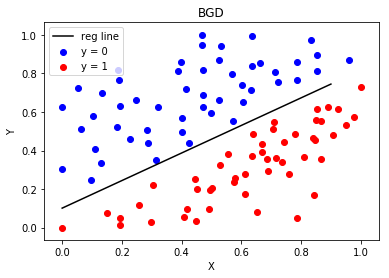

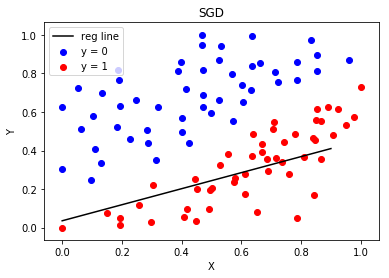

In [5]:
# plotting regression line
plot_reg(X, y, beta, 'BGD')

# plotting regression line
plot_reg(X, y, stochastic_beta, 'SGD')

In [6]:
def minibatch_grad_desc(X, y, beta, epochs, minibatch_size, lr):
    '''
    minibatch gradient descent function
    '''
    cost = cost_func(beta, X[0:minibatch_size,:], y[0:minibatch_size])
    change_cost = 1
    num_iter = 1

    for iter in range(epochs):
        X, y = shuffle(X,y) # Shuffle your data points
        for i in range(0,X.shape[0], minibatch_size): # Look your mini-batch
            minibatch_end = min(i + minibatch_size, X.shape[0]) # Find where your minibatch ends each time
            
            old_cost = cost
            beta = beta - (lr * log_gradient(beta, X[i:minibatch_end, :], y[i:minibatch_end]))
            cost = cost_func(beta, X[i:minibatch_end, :], y[i:minibatch_end]) # and then make a step
            change_cost = old_cost - cost
            num_iter += 1 # Time to go to the minibatch #2, #3, etc..
    
    return beta, num_iter 

# initial beta values for stochastic gradient descent
minibatch_beta = np.matrix(np.zeros(X.shape[1]))

# NOTE: modify these values for experimentation
epochs = 4
minibatch_size = 10
learning_rate = 0.1


start_time = time.time() # Get starting time
# beta values after running gradient descent
minibatch_beta, num_iter = minibatch_grad_desc(X_train, y_train, minibatch_beta,
                                               epochs, minibatch_size, learning_rate)

print("--- MINI-BATCH Gradient Descent ---")
print("--- %s seconds ---" % (time.time() - start_time)) # Print computation of time

# estimated beta values and number of iterations
print("Estimated regression coefficients:", minibatch_beta)
print("No. of iterations:", num_iter)

# predicted labels
y_pred = pred_values(minibatch_beta, X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",  (np.sum(y_test == y_pred) / y_test.shape[0]) * 100.0)

--- MINI-BATCH Gradient Descent ---
--- 0.005682229995727539 seconds ---
Estimated regression coefficients: [[ 0.37826821  1.33487436 -2.32053693]]
No. of iterations: 33
Logistic Regression model accuracy(in %): 100.0


## Mini-Batch Gradient Descent vs all
The **difference with BGD** is that we don't look the _whole_ dataset and then make a step.

We do the following: For each update we use a batch of `minibatch_size` examples to estimate the gradient. (after shuffling the x,y pairs)

The **difference with SGD** is that SGD uses `minibatch_size = 1`, which means it makes a step for each pair.

We can see that mini-batch is cheaper(in this set) when computing since it gets to the same result with very less iterations and seconds. (`iters:37 , time: 0.00948 secs`)

So, it can be seen that the **Mini-batch Gradient Descent** method finally takes the best of both worlds(_BGD & SGD_) and performs an update for every mini-batch of n training examples:

This way, it reduces the variance of the parameter updates, which can lead to more robust convergence.

Though, one downside of it is that the method requires the configuration of `minibatch_size` parameter.


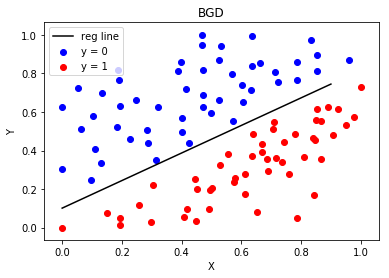

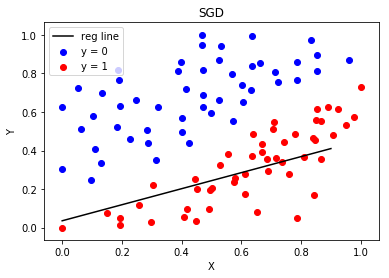

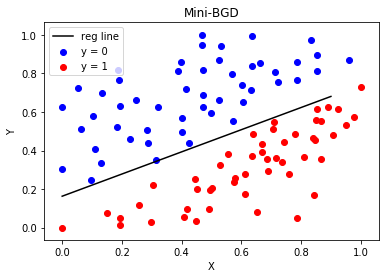

In [7]:
# plotting regression line
plot_reg(X, y, beta, 'BGD')

# plotting regression line
plot_reg(X, y, stochastic_beta, 'SGD')

# plotting regression line
plot_reg(X, y, minibatch_beta, 'Mini-BGD')

### Exercise 2  

**Modify this  example of using sklearn routines to solve the logistic regression problem with the above data set**

In [8]:
from sklearn import datasets, linear_model, metrics

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=1)

start_time = time.time() # Get starting time

# create logistic regression object
reg = linear_model.LogisticRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = reg.predict(X_test)


print("--- sklearn's Logistic Regression method ---")
print("--- %s seconds ---" % (time.time() - start_time)) # Print computation of time
 
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred) * 100.0)

--- sklearn's Logistic Regression method ---
--- 0.0019826889038085938 seconds ---
Logistic Regression model accuracy(in %): 100.0


# sklearn's LogisticRegression() vs all

In the other side, we can also use directly `sklearn`'s `LogisticRegression()` method.

Speaking about computing, it can get much cheaper ( see the `0.00137591362 seconds` in our instance) with an accuracy of 100% than regressing and trying to get it better with Gradient Descent variations

Info about the method, as seen in http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html :

_The training algorithm [of LogisticRegression()] uses a one-vs-all (OvA) scheme, rather than the “true” multinomial LR.
This class implements L1 and L2 regularized logistic regression using the liblinear library._
